In [292]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from collections import Counter
import matplotlib.pyplot as plt

# create discretizer
kbins = KBinsDiscretizer(n_bins=2, strategy='uniform', encode='ordinal')
# read spambase.data into pandas dataframe
df = pd.read_csv('spambase.data',header = None)

df = df[(df[57] == 1)]
print(len(df))
df.tail()
#df[(df[0] <= 2.38)]

1813


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
1808,0.00,0.00,0.00,0.0,0.00,0.23,0.00,0.00,0.00,0.00,...,0.077,0.038,0.000,0.000,0.000,0.038,2.600,42,182,1
1809,0.39,0.00,0.00,0.0,0.00,0.39,0.79,0.00,0.00,0.39,...,0.000,0.064,0.000,0.640,0.192,0.000,2.740,13,74,1
1810,0.00,0.00,0.77,0.0,0.38,0.38,0.38,0.00,0.00,0.77,...,0.063,0.127,0.255,0.510,0.000,0.000,3.685,62,258,1
1811,0.00,0.00,0.00,0.0,0.53,0.00,0.53,0.00,0.53,0.00,...,0.000,0.000,0.000,0.082,0.000,0.000,4.391,66,101,1
1812,0.00,0.31,0.42,0.0,0.00,0.10,0.00,0.52,0.21,0.52,...,0.000,0.016,0.000,0.887,0.032,0.049,3.446,318,1003,1


In [245]:
def plot_bins(values):
    """visualizes the number of observations in each bin"""

    counter = Counter(values)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Bins')
    plt.ylabel('Frequency')
    plt.show()

def show_bins(bins):
    """Shows the ranges of values the bins comprises"""

    for i in range(len(bins)-1):
        print(f'Bin {i}: {str(bins[i])} -> {str(bins[i+1])}')

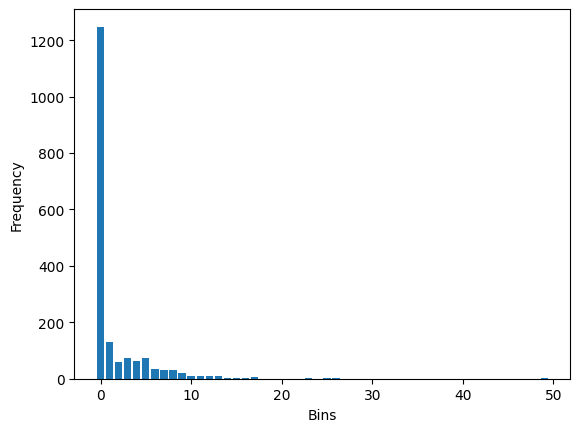

Bin 0: 0.0 -> 0.0908
Bin 1: 0.0908 -> 0.1816
Bin 2: 0.1816 -> 0.27240000000000003
Bin 3: 0.27240000000000003 -> 0.3632
Bin 4: 0.3632 -> 0.454
Bin 5: 0.454 -> 0.5448000000000001
Bin 6: 0.5448000000000001 -> 0.6356
Bin 7: 0.6356 -> 0.7264
Bin 8: 0.7264 -> 0.8172
Bin 9: 0.8172 -> 0.908
Bin 10: 0.908 -> 0.9988
Bin 11: 0.9988 -> 1.0896000000000001
Bin 12: 1.0896000000000001 -> 1.1804000000000001
Bin 13: 1.1804000000000001 -> 1.2712
Bin 14: 1.2712 -> 1.362
Bin 15: 1.362 -> 1.4528
Bin 16: 1.4528 -> 1.5436
Bin 17: 1.5436 -> 1.6344
Bin 18: 1.6344 -> 1.7252
Bin 19: 1.7252 -> 1.816
Bin 20: 1.816 -> 1.9068
Bin 21: 1.9068 -> 1.9976
Bin 22: 1.9976 -> 2.0884
Bin 23: 2.0884 -> 2.1792000000000002
Bin 24: 2.1792000000000002 -> 2.27
Bin 25: 2.27 -> 2.3608000000000002
Bin 26: 2.3608000000000002 -> 2.4516
Bin 27: 2.4516 -> 2.5424
Bin 28: 2.5424 -> 2.6332
Bin 29: 2.6332 -> 2.724
Bin 30: 2.724 -> 2.8148
Bin 31: 2.8148 -> 2.9056
Bin 32: 2.9056 -> 2.9964000000000004
Bin 33: 2.9964000000000004 -> 3.0872
Bin 34:

In [268]:
#bins = [2, 2, 2, 2]
att = df.iloc[:, 0:1]
att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# show results
plot_bins(Counter(list(att_bin.flatten())))
show_bins(kbins.bin_edges_[0])

In [288]:
# Equal-Width Discretization
frames = []
for i in range(0,57):
    bin = kbins.fit_transform(np.array(df.iloc[:, i:i + 1]).reshape(-1,1))
    frames.append(pd.DataFrame(bin, columns=[str(i)]))

data = pd.concat(frames, axis=1)
data
#att1 = df.iloc[:, 0:1]
#att2 = df.iloc[:, 1:2]
#att_bin = kbins.fit_transform(np.array(att).reshape(-1,1))
# att_bin48 = kbins.fit_transform(np.array(att48).reshape(-1,48))
# att_bin54 = kbins.fit_transform(np.array(att54).reshape(-1,6))
# att_bin55 = kbins.fit_transform(np.array(att55).reshape(-1,1))
# att_bin56 = kbins.fit_transform(np.array(att56).reshape(-1,1))
# att_bin57 = kbins.fit_transform(np.array(att57).reshape(-1,1))
#print(len(att_bin))

#att_bin_df = pd.DataFrame(att_bin)
# att_bin_df48 = pd.DataFrame(att_bin48)
# att_bin_df54 = pd.DataFrame(att_bin54)
# att_bin_df55 = pd.DataFrame(att_bin55)
# att_bin_df56 = pd.DataFrame(att_bin56)
# att_bin_df57 = pd.DataFrame(att_bin57)
#att_bin_df.head(100)
# show results
#plot_bins(Counter(list(att_bin.flatten())))
#show_bins(kbins.bin_edges_[0])
# frames = [att_bin_df48, att_bin_df54, att_bin_df55, att_bin_df56, att_bin_df57]

#data = pd.concat(frames, axis=1)
#data.head(100)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
#df[(df[1] <= 7.14)]
for k in range(0,57):
    print(str(k) + " " + str(len(data[(data[str(k)] == 2)])))

0 1
1 2
2 8
3 5
4 3
5 9
6 3
7 1
8 6
9 1
10 2
11 3
12 2
13 1
14 1
15 1
16 5
17 2
18 4
19 1
20 1
21 6
22 4
23 2
24 2
25 7
26 1
27 2
28 1
29 1
30 1
31 2
32 2
33 1
34 1
35 7
36 1
37 1
38 1
39 4
40 1
41 8
42 3
43 5
44 1
45 2
46 4
47 1
48 12
49 1
50 1
51 13
52 4
53 1
54 2
55 1
56 1


In [ ]:
"27 28 31 33 37 40 46 55"